# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** PCA vs. t-SNE for dimensionality reduction

</font>
</div>

# Dimensionality reduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Visually exploring the data can then become challenging and most of the time even practically impossible to do
manually. 

- However, such visual exploration is incredibly important in any data-related problem. Therefore it is
key to understand how to visualise high-dimensional datasets. This can be achieved using techniques known as 
dimensionality reduction. 

- This post will focus on two techniques that will allow us to do this: PCA and t-SNE.

</font>
</div>


# Import modules
<hr style = "border:2px solid black" ></hr>

In [22]:
import time
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
<hr style = "border:2px solid black" ></hr>

In [36]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

In [32]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [71]:
X = digits.data / 64.0
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [72]:
X

array([[0.      , 0.      , 0.078125, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.15625 , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.25    , 0.140625, 0.      ],
       ...,
       [0.      , 0.      , 0.015625, ..., 0.09375 , 0.      , 0.      ],
       [0.      , 0.      , 0.03125 , ..., 0.1875  , 0.      , 0.      ],
       [0.      , 0.      , 0.15625 , ..., 0.1875  , 0.015625, 0.      ]])

In [73]:
print(y)

[0 1 2 ... 8 9 8]


In [74]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (1797, 66)


<div class="alert alert-info">
<font color=black>

- Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. 

- The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are
zeros, etc.). 

- To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows 
us later to select the first five or ten thousand for our calculations and visualisations.

</font>
</div>

In [76]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

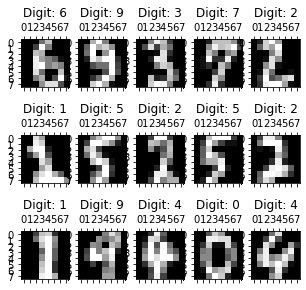

In [79]:
plt.gray()
fig = plt.figure( figsize=(5,5) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((8,8)).astype(float))
plt.show()

<div class="alert alert-info">
<font color=black>

- The image are 8x8 pixel images and therfore have a total of 64 dimensions each holding the value  of one specific pixel. To represent 1 one pixel is not enough, 2? 4? 16? how many?  

- The fact we can use any number takes as long as we are willing to lose some information. 

- What we can do is reduce the number of dimensions drastically whilst trying to retain as much of the ‘variation’ in the information as possible. This is where we
get to dimensionality reduction.

</font>
</div>

# Dimensionality reduction using PCA
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- PCA is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps 
the maximum amount of variation or information about how the original data is distributed. 

- It does NOT do this using guesswork but using HARD mathematics and it uses something known as the eigenvalues and eigenvectors of 
the data-matrix. 

- These eigenvectors of the covariance matrix have the property that they point along the major
directions of variation in the data. These are the directions of maximum variation in a dataset.

</font>
</div>

In [83]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation per principal component [%]: {}'.format(pca.explained_variance_ratio_*100))

Explained variation per principal component: [0.14890594 0.13618771 0.11794594]
Explained variation per principal component [%]: [14.89059358 13.61877124 11.79459376]


<div class="alert alert-info">
<font color=black>

- We can see that the first 2 contatins a bit more info than the third but not enough to say that the third is not necessary!

</font>
</div>

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

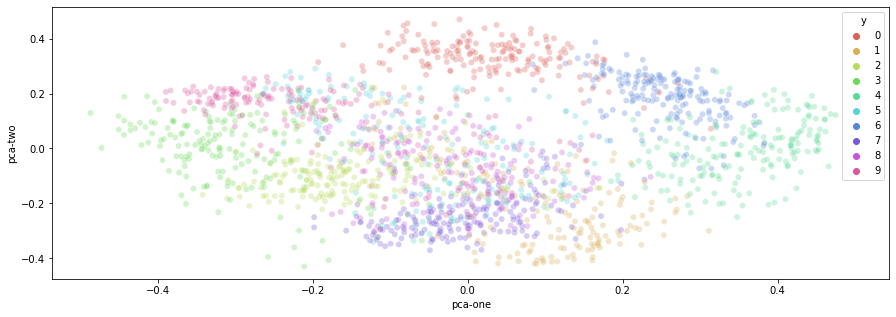

In [87]:
plt.figure(figsize=(15,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

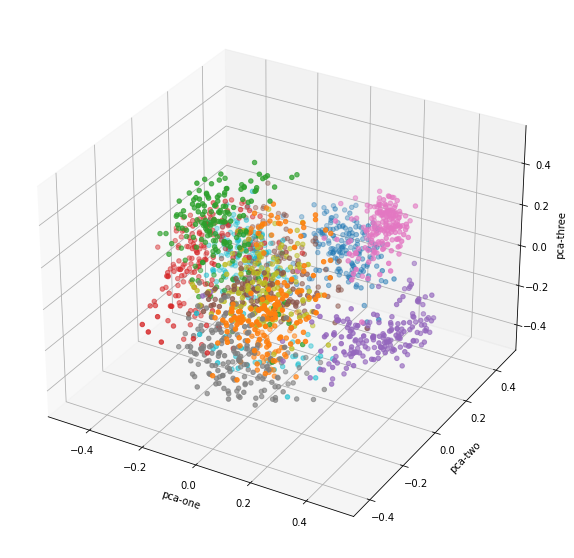

In [88]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# T-Distributed Stochastic Neighbouring Entities (t-SNE)
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. 

- Contrary to PCA it is not a mathematical technique but a probablistic one. 

</font>
</div>

In [93]:
N = 1000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [106]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.223211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.695549
[t-SNE] KL divergence after 300 iterations: 0.669519
t-SNE done! Time elapsed: 1.4087121486663818 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

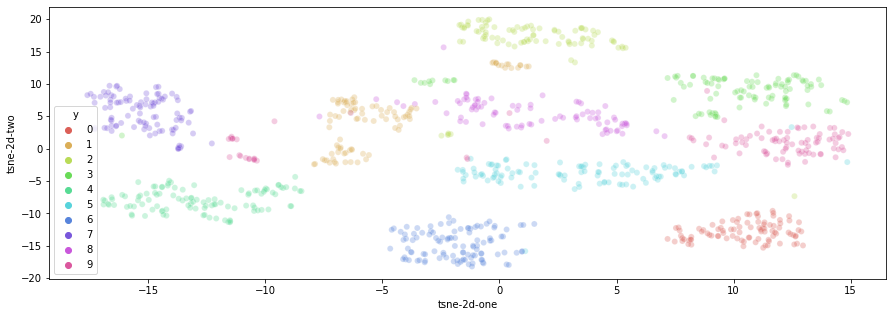

In [107]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(15, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<div class="alert alert-info">
<font color=black>

- This is already a significant improvement over the PCA visualisation we used earlier. 

- We can see that the digits are very clearly clustered in their own sub groups.

</font>
</div>

# How to combine PCA and t-SNE for large dataset?
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- We know t-SNE is very computationally expensive. It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable 
amount (e.g. 50) if the number of features is very high. 
- Since t-SNE scales quadratically in the number of objects N,
its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too
slow to be practical (and the memory requirements become too large.

</font>
</div>

In [117]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9995428789830801


In [118]:
pca_20 = PCA(n_components=20)
pca_result_20 = pca_20.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9995428789830801


<div class="alert alert-info">
<font color=black>

- Amazingly, the first 50 components roughly hold around 85% of the total variation in the data, which is not suprising
as the dataset has 64 dimensions in total. 
- Thus, we have further reduce the number down to the first 20 dimensions.

</font>
</div>

In [120]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_20)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.2893569469451904 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

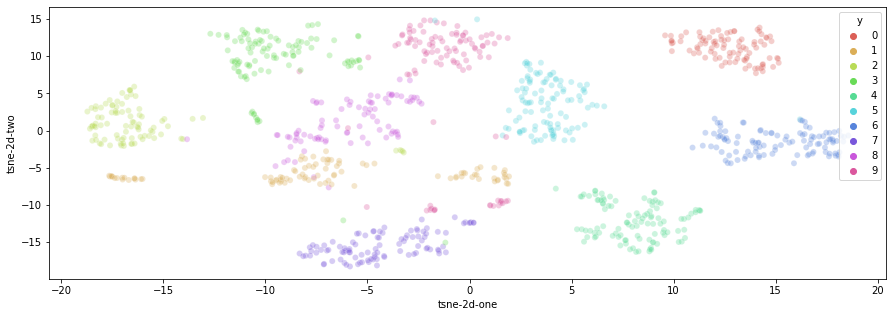

In [121]:
df_subset['tsne-2d-one'] = tsne_pca_results[:,0]
df_subset['tsne-2d-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(15, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<div class="alert alert-info">
<font color=black>

- From this plot we can clearly see how all the samples are nicely spaced apart and grouped together with their 
respective digits.

</font>
</div>

# What is next?
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- This could be an amazing starting point to then use a clustering algorithm and try to identify the clusters or 
to actually use these two dimensions as input to another algorithm (e.g., something like a Neural Network).

</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

</font>
</div>